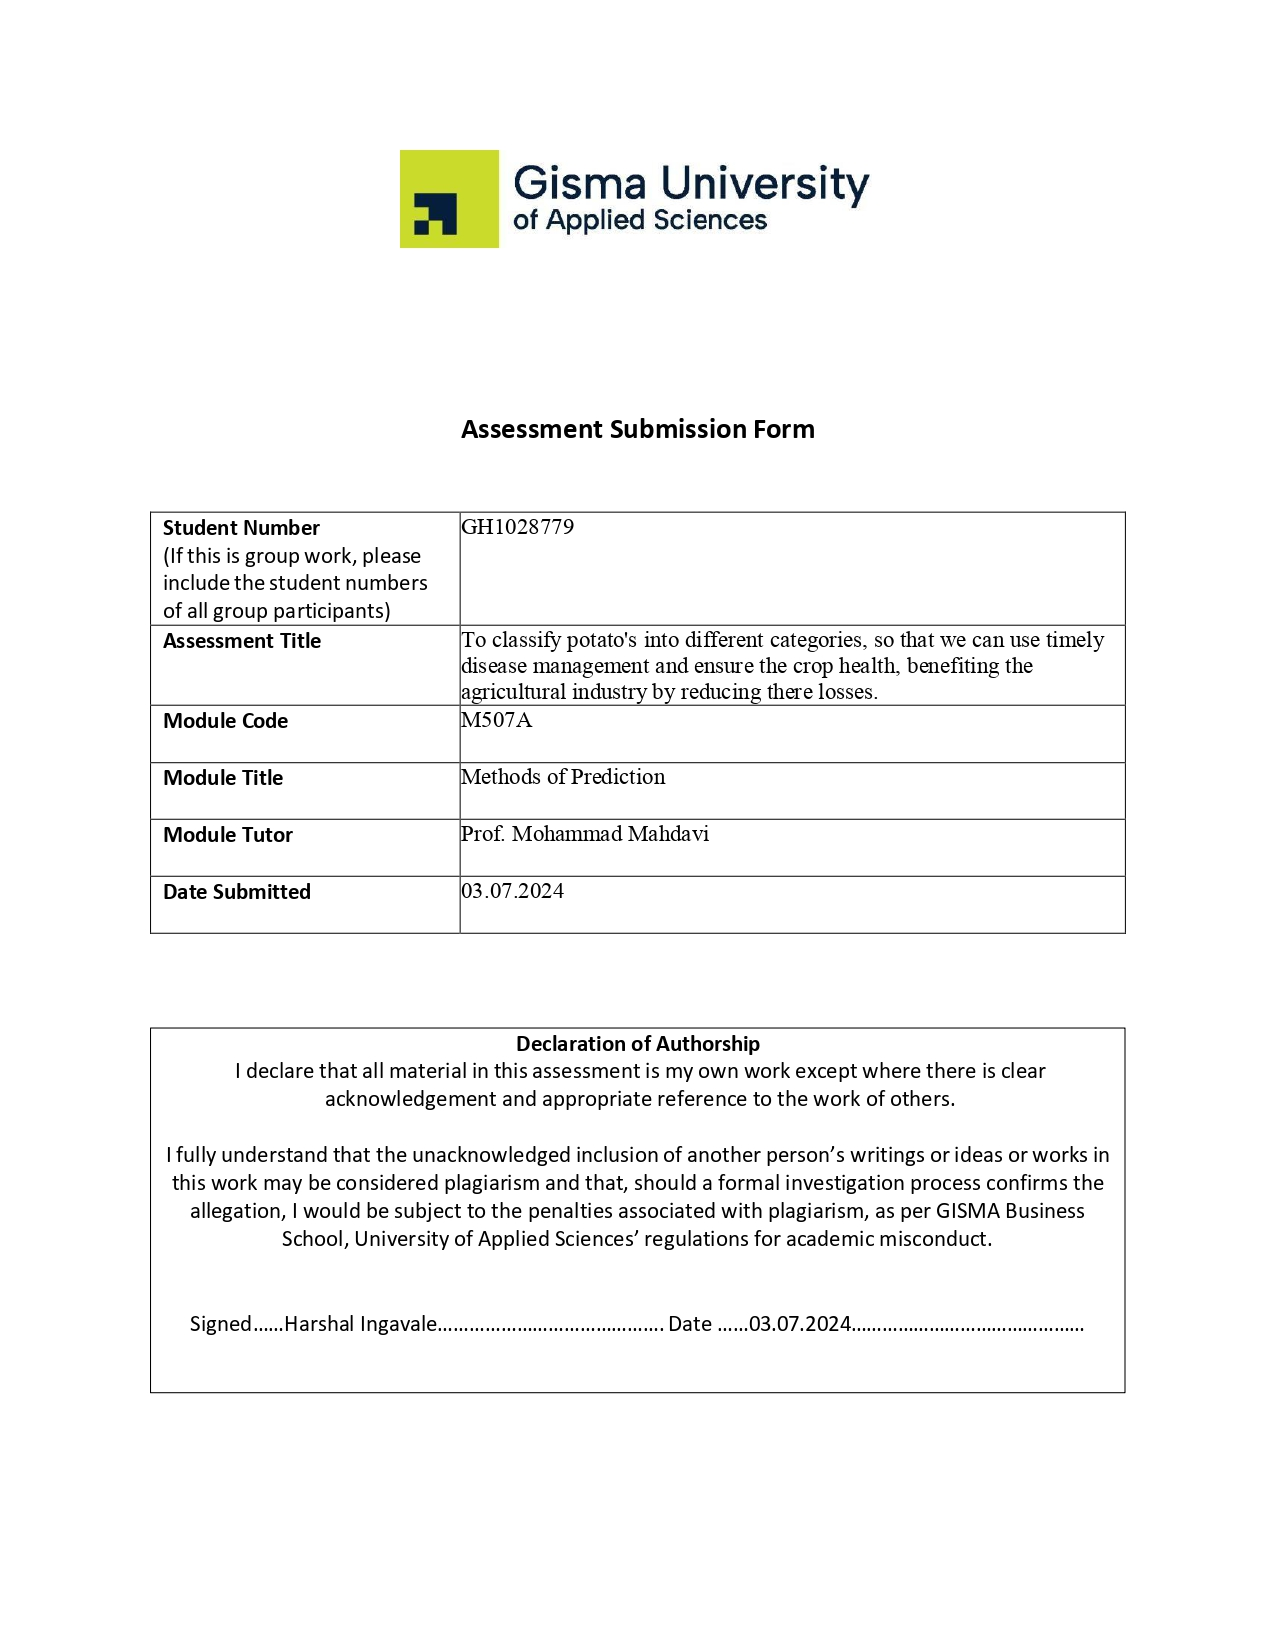

# Problem Statement
##### The link to dataset is [here](https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld)

### To classify potato's into different categories, so that we can use timely disease management and ensure the crop health, benefiting the agricultural industry by reducing there losses. 

## Business Question

### An Agricultural Industry is facing challenges due to potato diseases, which are drastically reducing crop quality and yield Therefore, Build a mod_el that can identify the disease in advance so that the industry can tackle the problem and reduce there financial losses.

## Business Importance

- **Time Interventions:** Identifying diseases early can allow timely intervention, reducing crop damages and increasing yield.
- **Cost Savings:** Effective disease management can reduce the need for extensive pesticide use, that can save costs for farmers.
- **Food Security:** contibuting Healthy crops make food security, by ensuring a stable supply of potatoes.


## Data Exploration

### Importing Libraries

In [5]:
import os
import pandas as pa
import matplotlib.pyplot as mpl
import tensorflow as tsfw
import numpy as npy
import keras_tuner as kert
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from PIL import Image

In [16]:
dataset_path = '/Users/harshalingawale/Downloads'

train_dir = os.path.join(dataset_path, 'PLD_3_Classes_256/Training')
validation_dir = os.path.join(dataset_path, 'PLD_3_Classes_256/Validation')
test_dir = os.path.join(dataset_path, 'PLD_3_Classes_256/Testing')


In [18]:
print("Train Dir:", train_dir)
print("Vali Dir:", validation_dir)
print("Test dir:", test_dir)

print("Training Directory Exists:", os.path.exists(train_dir))
print("Validation Directory Exists:", os.path.exists(validation_dir))
print("Test dir Exists:", os.path.exists(test_dir))

Train Dir: /Users/harshalingawale/Downloads/PLD_3_Classes_256/Training
Vali Dir: /Users/harshalingawale/Downloads/PLD_3_Classes_256/Validation
Test dir: /Users/harshalingawale/Downloads/PLD_3_Classes_256/Testing
Training Directory Exists: True
Validation Directory Exists: True
Test dir Exists: True


##### After importing libraries, we have defined path to the extracted dataset then verified paths and check if directories exist.

In [21]:
def display_sample_images(directory, title):
    sample_dig = []
    labels = []
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path)[:5]:
                file_path = os.path.join(subdir_path, file)
                if os.path.isfile(file_path):
                    img = Image.open(file_path)
                    sample_dig.append(img)
                    labels.append(subdir)

    mpl.figure(figsize=(15, 10))
    mpl.suptitle(title, fontsize=20)
    for i, (img, label) in enumerate(zip(sample_dig, labels)):
        mpl.subplot(3, 5, i + 1)
        mpl.imshow(img)
        mpl.title(label)
        mpl.axis('off')
    mpl.show()

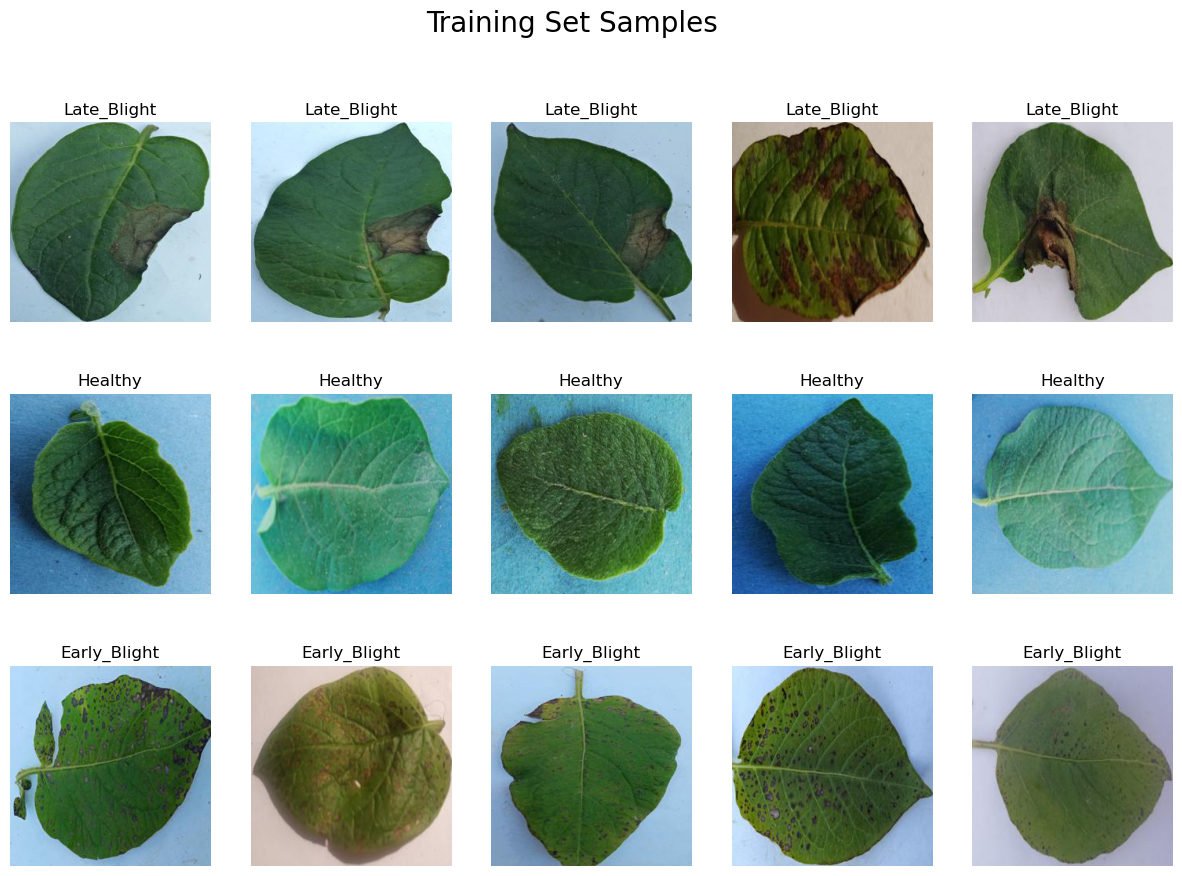

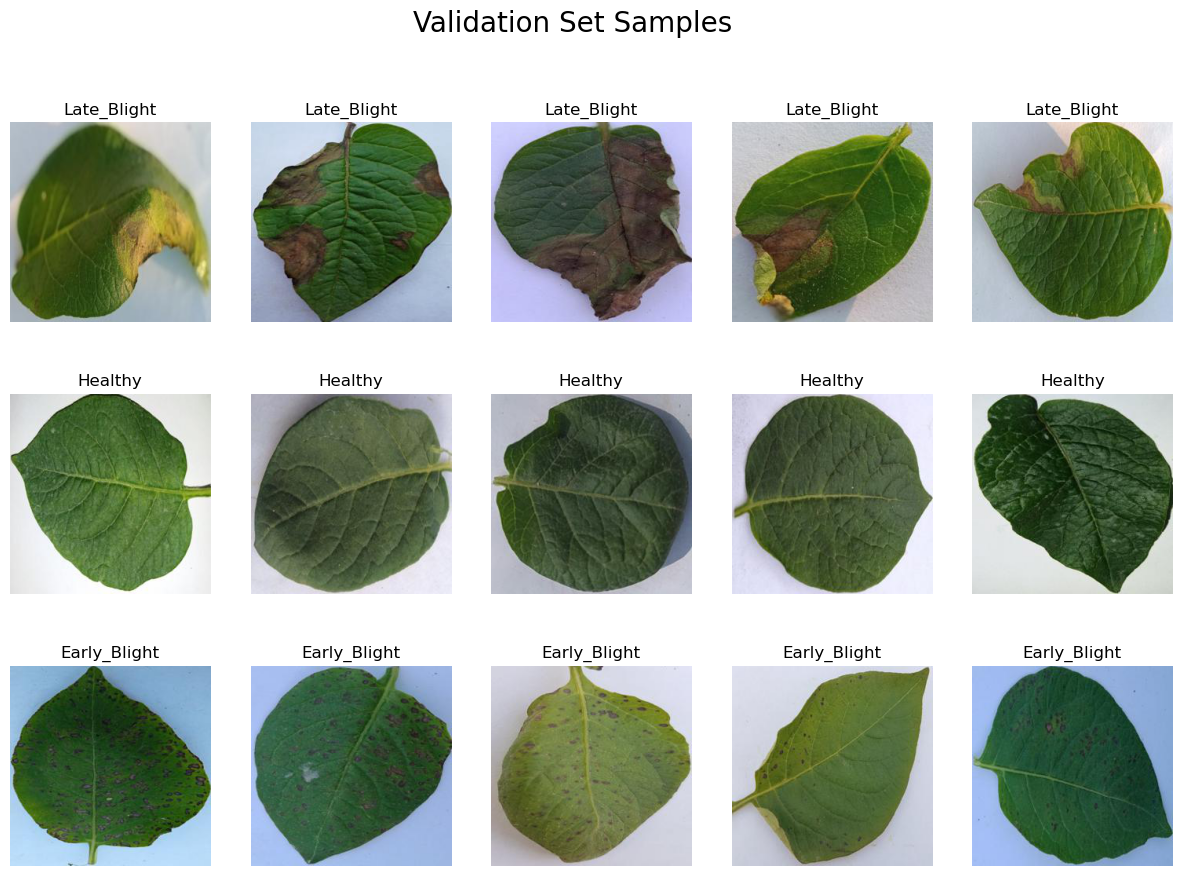

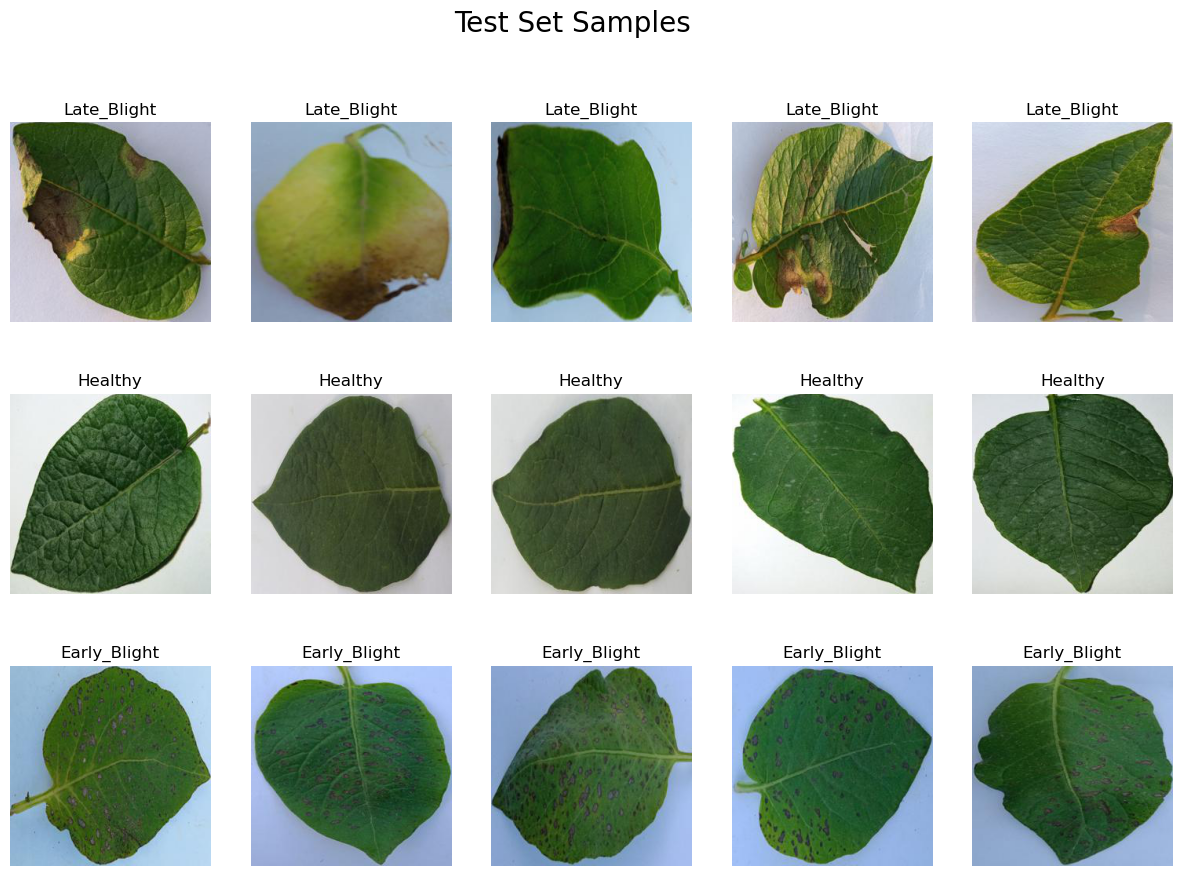

In [23]:
display_sample_images(train_dir, 'Training Set Samples')
display_sample_images(validation_dir, 'Validation Set Samples')
display_sample_images(test_dir, 'Test Set Samples')

##### From the above diagram we can see sample images from training, validation, and test sets.

## Data Preprocessing

In [27]:
image_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [29]:
tr_gen = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
vali_gen = datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


te_dagen = ImageDataGenerator(rescale=1.0/255)
tes_ge = te_dagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


##### After defining image size and batch size we have loaded training, validation and test data in which we seperated images in diferent classes 

## Visualization

In [33]:
mod_el = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') 
])


mod_el.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


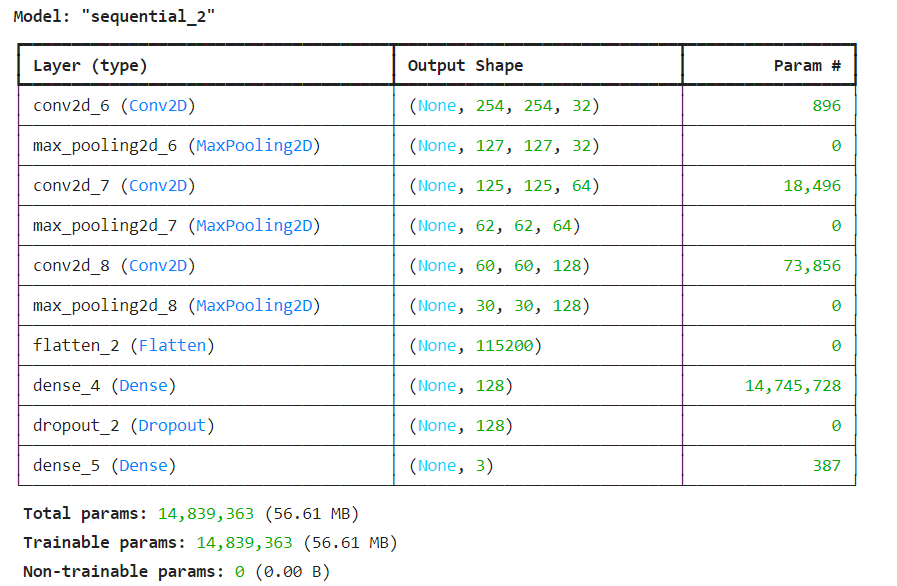

##### From the above table we can see an CNN model having different layers, output shape and parameter.

## Basic model Training

In [38]:
def create_model(conv_filters=[32, 64, 128], dropout_rate=0.5, learning_rate=0.001):
    mod_el = Sequential([
        Conv2D(conv_filters[0], (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(conv_filters[1], (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(conv_filters[2], (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax') 
    ])
    mod_el.compile(optimizer=tsfw.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return mod_el

mod_el = create_model()

er_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
mo_che = ModelCheckpoint('best_model.keras', save_best_only=True)

his_tri = mod_el.fit(
    tr_gen,
    validation_data=vali_gen,
    epochs=10,
    callbacks=[er_stop, mo_che],
     verbose=0
)

##### Here we have trained the model and also used verbose function to hide the Epochs.

In [31]:
train_acc = his_tri.history['accuracy']
val_acc = his_tri.history['val_accuracy']
print(f"Train_score: {train_acc[-1]}")
print(f"Validation_score: {val_acc[-1]}")

Train_score: 0.8526607155799866
Validation_score: 0.8846153616905212


##### Here, we have used keras to train the model and also set up an callback function to do early stopping in which best keras model is saved so that we can use it in further.

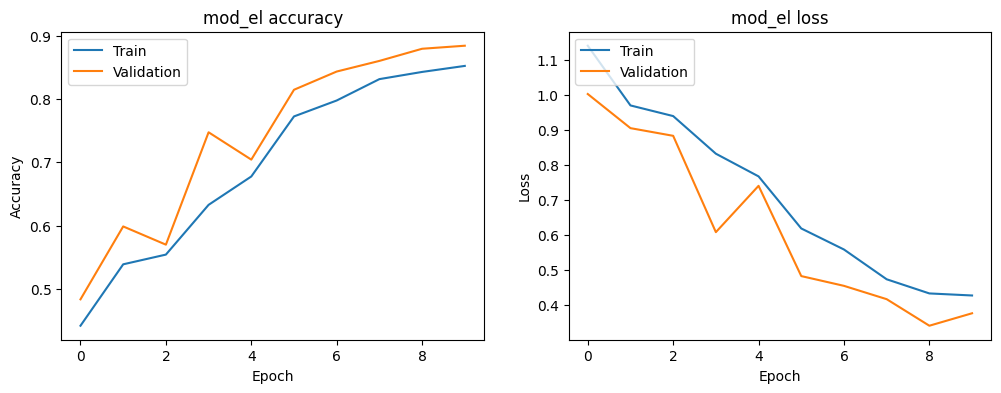

In [32]:
mpl.figure(figsize=(12, 4))
mpl.subplot(1, 2, 1)
mpl.plot(his_tri.history['accuracy'])
mpl.plot(his_tri.history['val_accuracy'])
mpl.title('mod_el accuracy')
mpl.ylabel('Accuracy')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Validation'], loc='upper left')

mpl.subplot(1, 2, 2)
mpl.plot(his_tri.history['loss'])
mpl.plot(his_tri.history['val_loss'])
mpl.title('mod_el loss')
mpl.ylabel('Loss')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Validation'], loc='upper left')
mpl.show()

##### here in above graph we can see two different plots of model accuracy and model loss, which contain train and validation section

## Experimental Section 

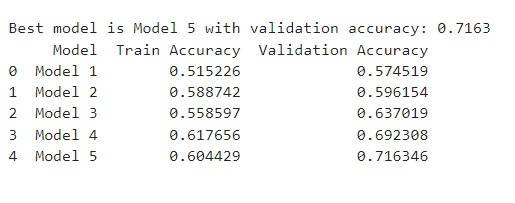

##### In the experimental stage we trained five different models where we got 0.71 validation accuracy, know we will fine tune the hyperparameters further to achieve best accuracy.

### hyperparameter tuning with keras tuner

In [33]:
class MyHyperModel(kert.HyperModel):
    def build(self, hp):
        mod_el = Sequential()
        mod_el.add(Conv2D(hp.Int('conv1_filters', 32, 128, step=32), (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
        mod_el.add(MaxPooling2D(pool_size=(2, 2)))
        mod_el.add(Conv2D(hp.Int('conv2_filters', 32, 128, step=32), (3, 3), activation='relu'))
        mod_el.add(MaxPooling2D(pool_size=(2, 2)))
        mod_el.add(Conv2D(hp.Int('conv3_filters', 32, 128, step=32), (3, 3), activation='relu'))
        mod_el.add(MaxPooling2D(pool_size=(2, 2)))
        mod_el.add(Flatten())
        mod_el.add(Dense(128, activation='relu'))
        mod_el.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
        mod_el.add(Dense(3, activation='softmax'))

        mod_el.compile(optimizer=tsfw.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                      loss='categorical_crossentropy', metrics=['accuracy'])
        return mod_el

In [34]:
tu_ner = kert.RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='potato_disease'
)

Reloading Tuner from my_dir\potato_disease\tuner0.json


In [39]:
tu_ner.search(tr_gen, validation_data=vali_gen, epochs=10, callbacks=[er_stop])

best_hps = tu_ner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters in the first convolutional layer is {best_hps.get('conv1_filters')},
the second convolutional layer is {best_hps.get('conv2_filters')},
the third convolutional layer is {best_hps.get('conv3_filters')},
the dropout rate is {best_hps.get('dropout_rate')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The optimal number of filters in the first convolutional layer is 64,
the second convolutional layer is 64,
the third convolutional layer is 64,
the dropout rate is 0.30000000000000004,
and the optimal learning rate for the optimizer is 0.0002869865464178264.



##### Here, we have used hyperparameter tuning with keras tuner and then we have Initialize the tu_ner by using random search and then performed hyperparameter search and then we got the hyperparameter which is optimal.

In [60]:
mod_el = tu_ner.hypermodel.build(best_hps)

er_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
mo_che = ModelCheckpoint('best_tuned_model.keras', save_best_only=True)

his_tri = mod_el.fit(
    tr_gen,
    validation_data=vali_gen,
    epochs=15,
    callbacks=[er_stop, mo_che],
    verbose = 0
)


##### We have build and trained the model with the optimal hyperparameters and then set up callback function again to train the model. we have also used verbose as used previously to hide Epochs.

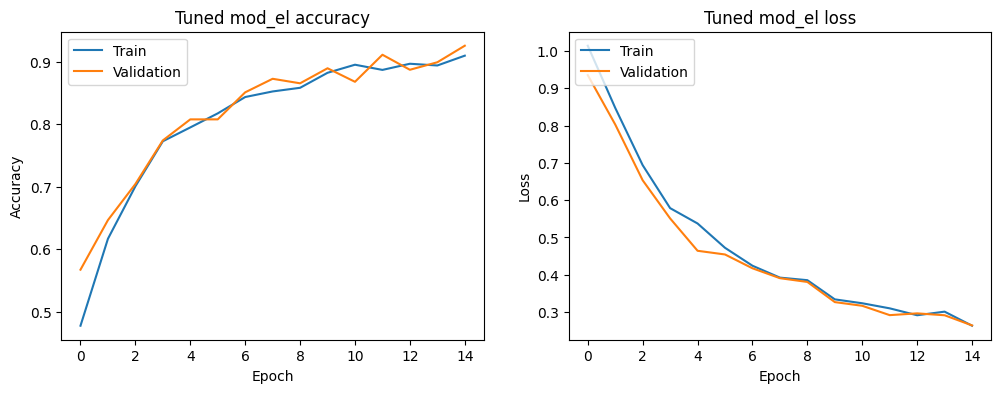

In [41]:
mpl.figure(figsize=(12, 4))
mpl.subplot(1, 2, 1)
mpl.plot(his_tri.history['accuracy'])
mpl.plot(his_tri.history['val_accuracy'])
mpl.title('Tuned mod_el accuracy')
mpl.ylabel('Accuracy')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Validation'], loc='upper left')

mpl.subplot(1, 2, 2)
mpl.plot(his_tri.history['loss'])
mpl.plot(his_tri.history['val_loss'])
mpl.title('Tuned mod_el loss')
mpl.ylabel('Loss')
mpl.xlabel('Epoch')
mpl.legend(['Train', 'Validation'], loc='upper left')
mpl.show()

In [42]:
train_acc = his_tri.history['accuracy']
val_acc = his_tri.history['val_accuracy']
print(f"Train_score: {train_acc[-1]}")
print(f"Validation_score: {val_acc[-1]}")

Train_score: 0.9095662832260132
Validation_score: 0.9254807829856873


##### Therefore, in the updated graph we have ploted training & Validation_score and loss values for the tuned model and we can see and increase of accuracy in tuned model and also less loss in tuned model.

## Conclusion

#### Through the systematic exploration of different hyperparameter configurations, we have optimized our model for potato disease classification where our final model achieved better accuracy and reduced loss on both datasets, therefore we have demonstrate the effectiveness of hyperparameter tuning in deep learning model development and also trained different models.